## Project 1: Cleaning and Analyzing Crime Data

**Task 1**

Data Acquisition: Download the dataset from the provided link and load it into your
preferred data analysis tool.

**Task 2** Data Inspection:

* Display the first few rows of the dataset.
* Check the data types of each column.
* Review column names and descriptions, if available.

In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore') # Ignore all warnings

# Load CSV file
crime_data = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
crime_data
print("="*80)

# Display first few rows
print(crime_data.head())
print("="*80)

# Display data types of each column
print(crime_data.dtypes)
print("="*80)

# Review column names and descriptions, if available.
print(crime_data.info())
print(crime_data.describe(include='all'))

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  211507896  04/11/2021 12:00:00 AM  11/07/2020 12:00:00 AM       845    15   
1  201516622  10/21/2020 12:00:00 AM  10/18/2020 12:00:00 AM      1845    15   
2  240913563  12/10/2024 12:00:00 AM  10/30/2020 12:00:00 AM      1240     9   
3  210704711  12/24/2020 12:00:00 AM  12/24/2020 12:00:00 AM      1310     7   
4  201418201  10/03/2020 12:00:00 AM  09/29/2020 12:00:00 AM      1830    14   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0  N Hollywood         1502         2     354   
1  N Hollywood         1521         1     230   
2     Van Nuys          933         2     354   
3     Wilshire          782         1     331   
4      Pacific         1454         1     420   

                                         Crm Cd Desc  ... Status  Status Desc  \
0                                  THEFT OF IDENTITY  ...     IC  Invest Cont   
1     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     

**Task 3** Data Cleaning:

* Identify and handle missing data appropriately.
* Check for and remove duplicate rows.
* Convert data types if needed (e.g., dates to date format, numerical values to
appropriate numeric types).
* Deal with outliers if relevant to your analysis.
* Standardize or normalize numerical data as necessary.
* Encode categorical data if present

In [2]:
# Check missing values
missing_values = crime_data.isnull().sum()
print(missing_values[missing_values > 0])
print("="*80)

# Handling missing values
for col in crime_data.columns:
    if crime_data[col].dtype in ['int64', 'float64']:  # Numeric columns
        if abs(crime_data[col].skew()) > 1:
            crime_data[col].fillna(crime_data[col].median(), inplace=True)
        else:
            crime_data[col].fillna(crime_data[col].mean(), inplace=True)
    else:  # Categorical columns
        crime_data[col].fillna(crime_data[col].mode()[0], inplace=True)
        
# Check if missing values are handled
missing_values = crime_data.isnull().sum()
print(missing_values)
print("="*80)

# Check Duplicates
num_duplicates = crime_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
print("="*80)

# Remove Duplicates
crime_data.drop_duplicates(inplace=True)
num_duplicates = crime_data.duplicated().sum()
print(f"Number of duplicate rows after dropping: {num_duplicates}")
print("="*80)

# Convert data types
for col in ['DATE OCC', 'Date Rptd']:
    if col in crime_data.columns:
        crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')

# Convert numerical columns to appropriate numeric types
numeric_columns = ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd 1', 'Weapon Used Cd', 'Premis Cd', 'LAT', 'LON']
for col in numeric_columns:
    crime_data[col] = pd.to_numeric(crime_data[col], errors='coerce')#If 'coerce', then invalid parsing will be set as NaN.

print(crime_data.dtypes)

Mocodes            151619
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
Cross Street       850755
dtype: int64
DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64
Number of duplicate rows: 0
Number of duplicate rows after dropping: 0
DR_NO

Numeric columns: ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']


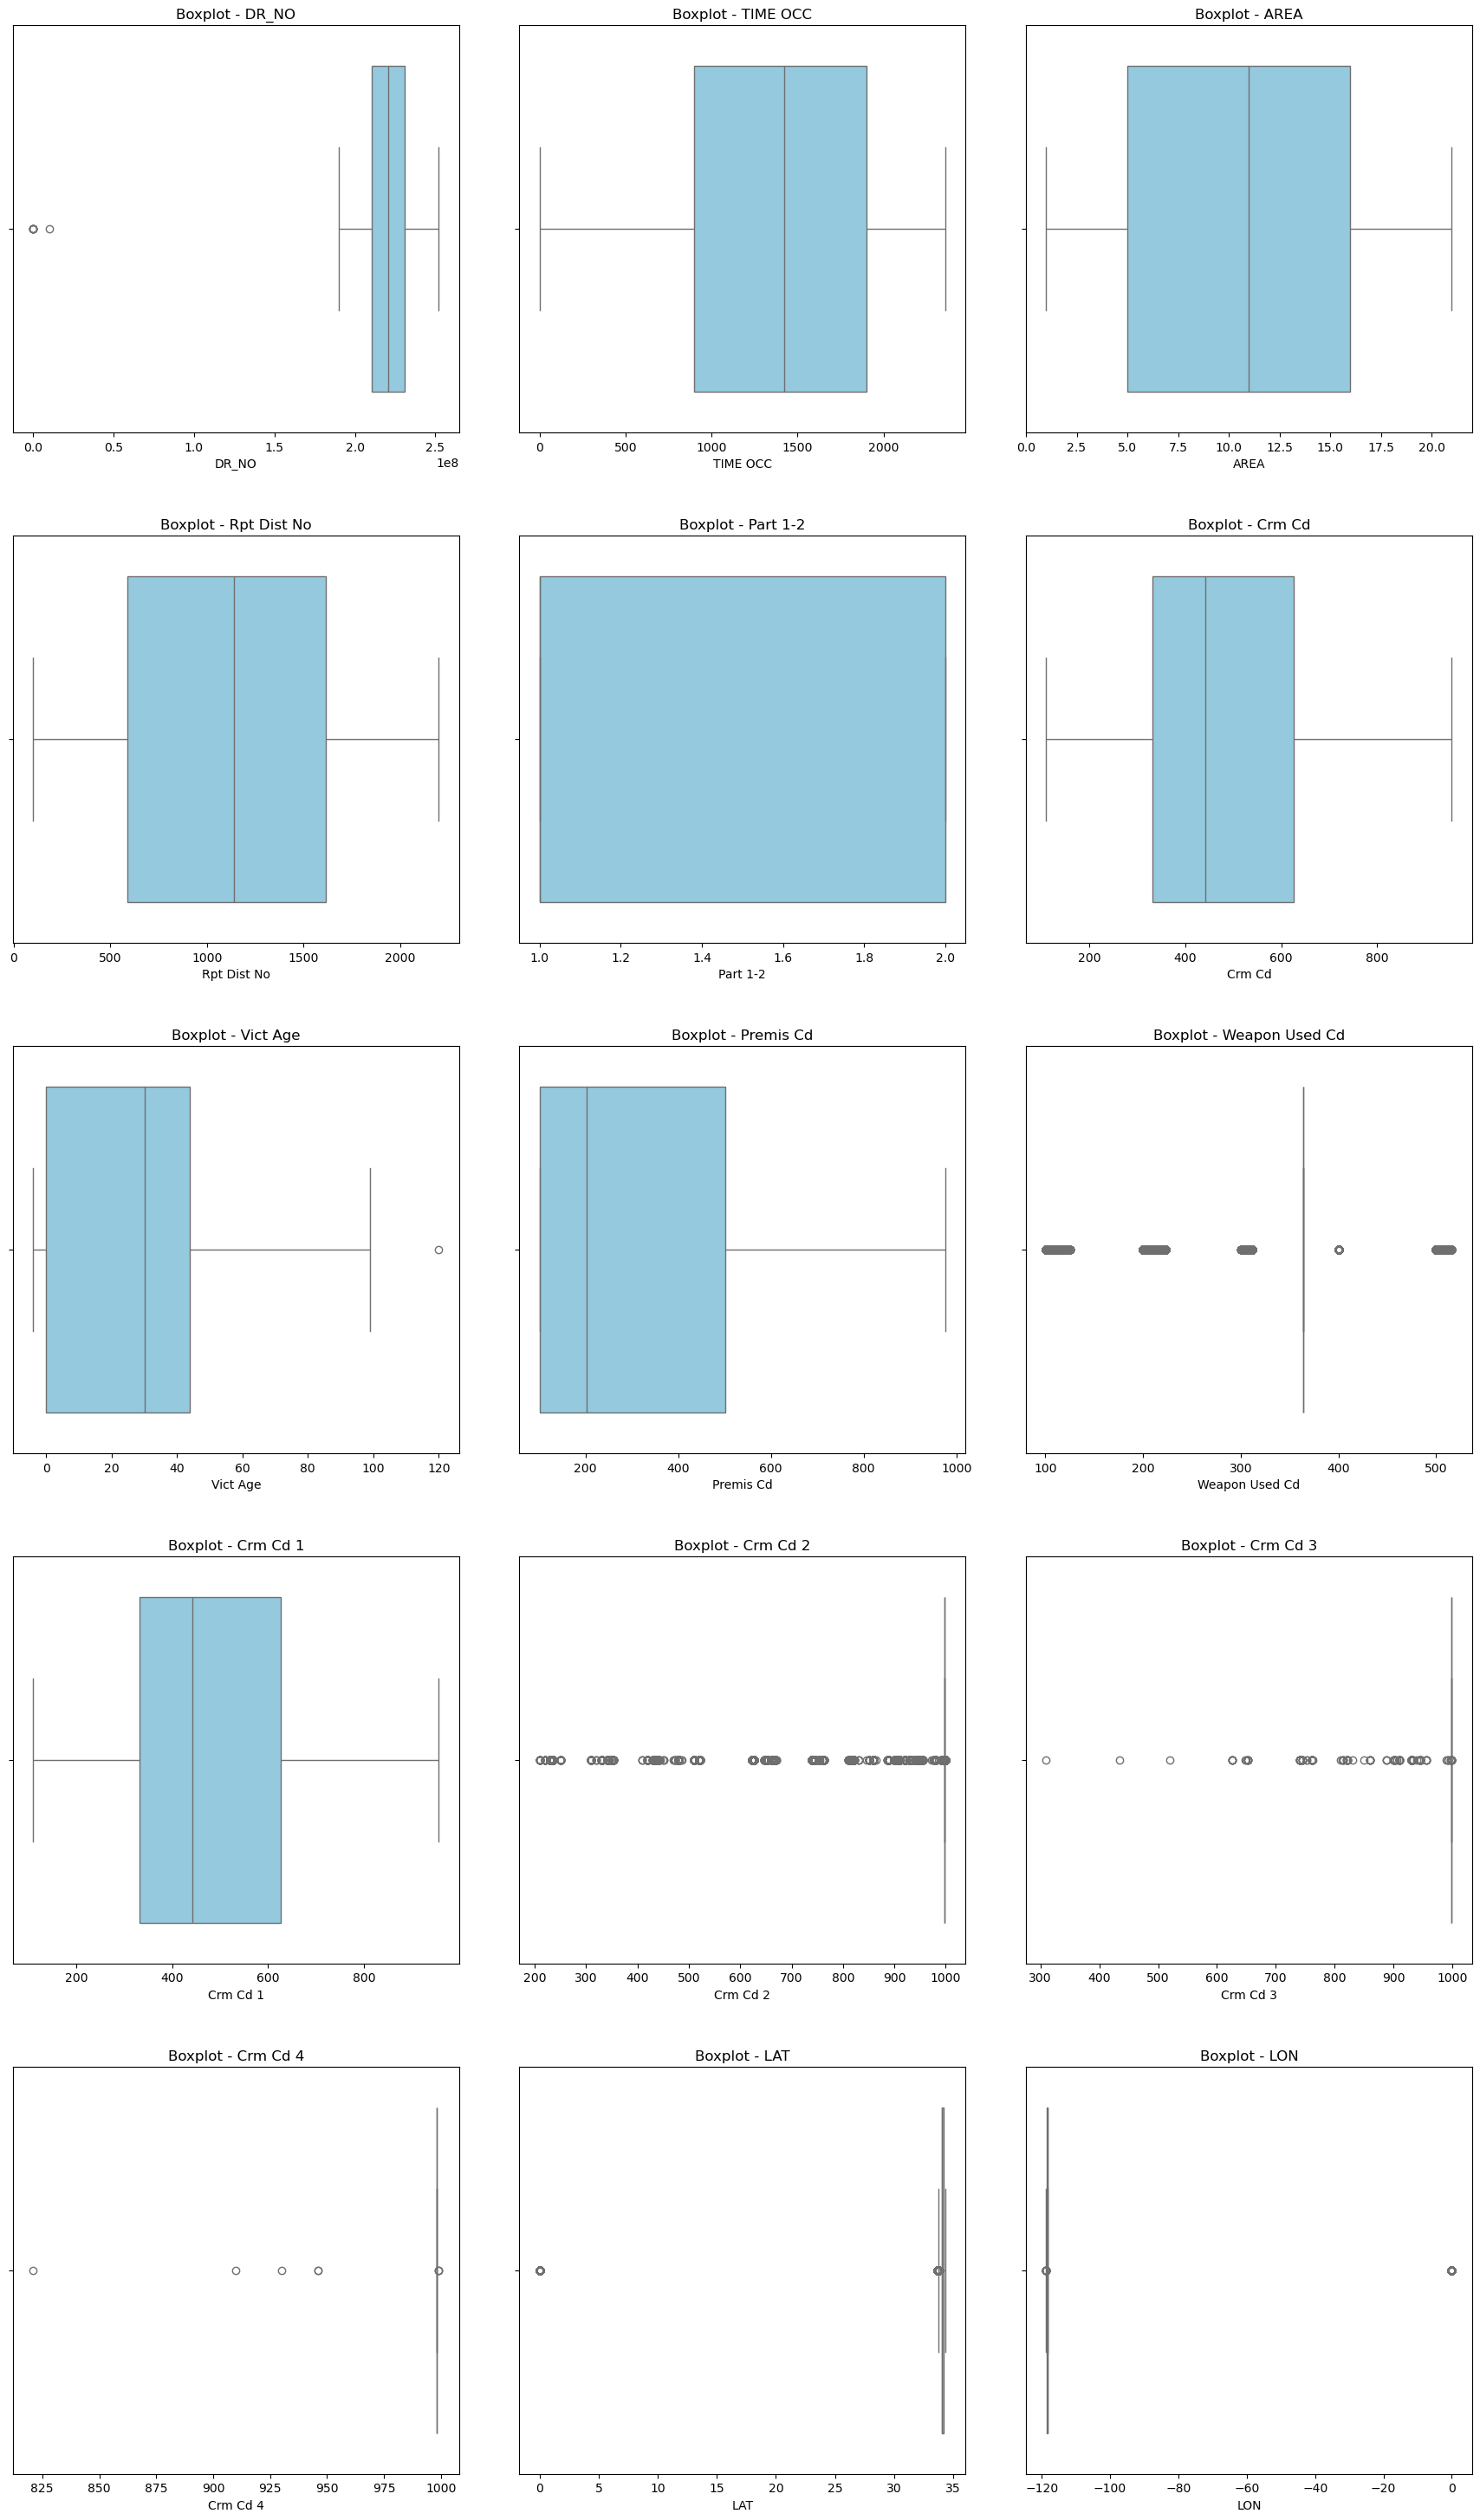

DR_NO: removed 8 outliers
TIME OCC: removed 0 outliers
AREA: removed 0 outliers
Rpt Dist No: removed 0 outliers
Part 1-2: removed 0 outliers
Crm Cd: removed 0 outliers
Vict Age: removed 1 outliers
Premis Cd: removed 0 outliers
Weapon Used Cd: removed 327245 outliers
Crm Cd 1: removed 64021 outliers
Crm Cd 2: removed 1803 outliers
Crm Cd 3: removed 2 outliers
Crm Cd 4: removed 0 outliers
LAT: removed 21611 outliers
LON: removed 0 outliers

 Outlier handling complete.
Remaining data shape: (590300, 28)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select all the numeric columns
numeric_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(numeric_columns))

# Indentify dataset outliers
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=crime_data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot - {col}", fontsize=12)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=4.0)
plt.show()

# Deal with outliers
# Function that will remove outliers using the Inter Quartile Range
def remove_outliers(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    before = dataset.shape[0]
    data = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    after = data.shape[0]
    print(f"{column}: removed {before - after} outliers")
    return data

for col in numeric_columns:
    crime_data = remove_outliers(crime_data, col)

print("\n Outlier handling complete.")
print("Remaining data shape:", crime_data.shape)

In [5]:
df = crime_data.copy()

In [6]:
# Standardize or normalize numerical data as necessary.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create scaler instances
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

# Apply standard scaling to 'Vict Age'
df['Vict Age'] = std_scaler.fit_transform(df[['Vict Age']])

# Apply min-max normalization to 'TIME OCC', 'LAT', and 'LON'
df[['TIME OCC']] = mm_scaler.fit_transform(df[['TIME OCC']])
df[['LAT']] = mm_scaler.fit_transform(df[['LAT']])
df[['LON']] = mm_scaler.fit_transform(df[['LON']])

# Display a sample of the transformed data
print(df.loc[:, ['Vict Age', 'TIME OCC', 'LAT', 'LON']].head())

   Vict Age  TIME OCC       LAT       LON
0  0.218125  0.357930  0.769826  0.504490
2  0.175074  0.525445  0.717523  0.423077
3  0.906938  0.555131  0.432779  0.571847
4  1.595752  0.775657  0.333459  0.454119
5  0.390328  0.512723  0.525491  0.975791


In [7]:
# Encode categorical data if present.
from sklearn.preprocessing import LabelEncoder

# Specify columns for different encoding methods
onehot_features = ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc']
label_features = ['Mocodes', 'LOCATION', 'Cross Street']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=onehot_features, drop_first=True)

# Apply label encoding to selected columns
encoders = {}
for feature in label_features:
    encoder = LabelEncoder()
    df_encoded[feature] = encoder.fit_transform(df_encoded[feature])
    encoders[feature] = encoder

# Preview encoded dataset
print(df_encoded.head())

       DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA  Rpt Dist No  Part 1-2  \
0  211507896 2021-04-11 2020-11-07  0.357930    15         1502         2   
2  240913563 2024-12-10 2020-10-30  0.525445     9          933         2   
3  210704711 2020-12-24 2020-12-24  0.555131     7          782         1   
4  201418201 2020-10-03 2020-09-29  0.775657    14         1454         1   
5  240412063 2024-12-11 2020-11-11  0.512723     4          429         2   

   Crm Cd  Mocodes  Vict Age  ...  Status_AO  Status_CC  Status_IC  Status_JA  \
0     354    33539  0.218125  ...      False      False       True      False   
2     354    33539  0.175074  ...      False      False       True      False   
3     331    15535  0.906938  ...      False      False       True      False   
4     420    49403  1.595752  ...      False      False       True      False   
5     354        0  0.390328  ...      False      False       True      False   

   Status_JO  Status Desc_Adult Other  Status Desc

**Task 4** Exploratory Data Analysis (EDA):

* Visualize overall crime trends from 2020 to the present year.
* Analyze and visualize seasonal patterns in crime data.
* Identify the most common type of crime and its trends over time.
* Investigate if there are any notable differences in crime rates between regions or cities.
* Explore correlations between economic factors (if available) and crime rates.
* Analyze the relationship between the day of the week and the frequency of certain types of crimes.
* Investigate any impact of significant events or policy changes on crime rates.

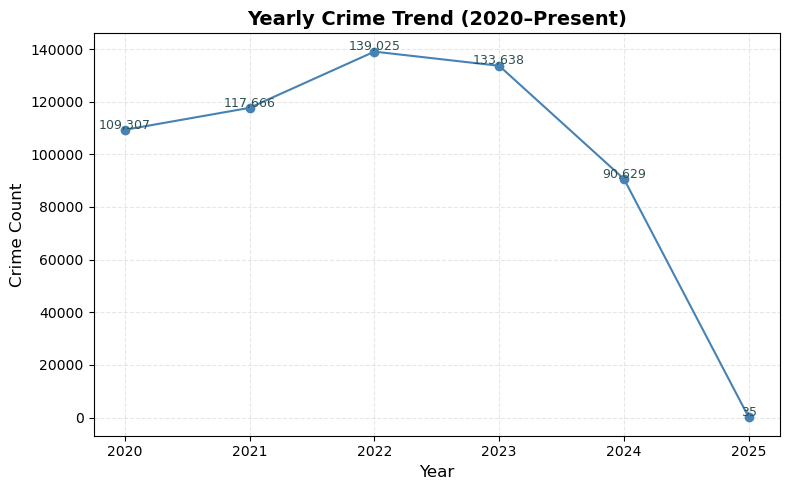

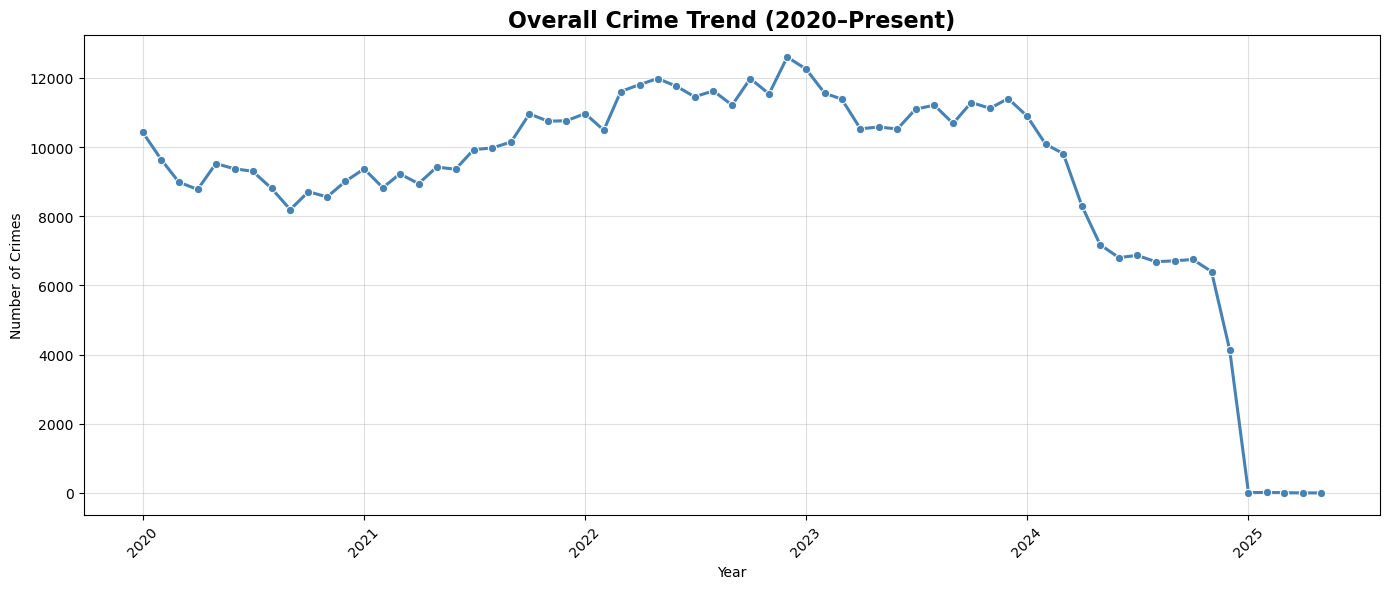

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overall crime trends (2020-Present)

# By year
df['Year'] = df['DATE OCC'].dt.year
yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(yearly_counts.index, yearly_counts, color='steelblue', marker='o')
plt.title('Yearly Crime Trend (2020–Present)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)

for year, total in yearly_counts.items():
    plt.text(year, total + 500, f'{total:,}', ha='center', fontsize=9, color='darkslategray')
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(yearly_counts.index)
plt.tight_layout()
plt.show()

#  By year-month
df = df[df['DATE OCC'].dt.year >= 2020].copy()
df['YearMonth'] = df['DATE OCC'].dt.to_period('M').dt.to_timestamp() 

overall_trend = df.groupby('YearMonth').size().reset_index(name='Crime_Count')

plt.figure(figsize=(14,6))
sns.lineplot(data=overall_trend, x='YearMonth', y='Crime_Count', marker='o', linewidth=2.2, color='steelblue')
plt.title('Overall Crime Trend (2020–Present)', fontsize=16, weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

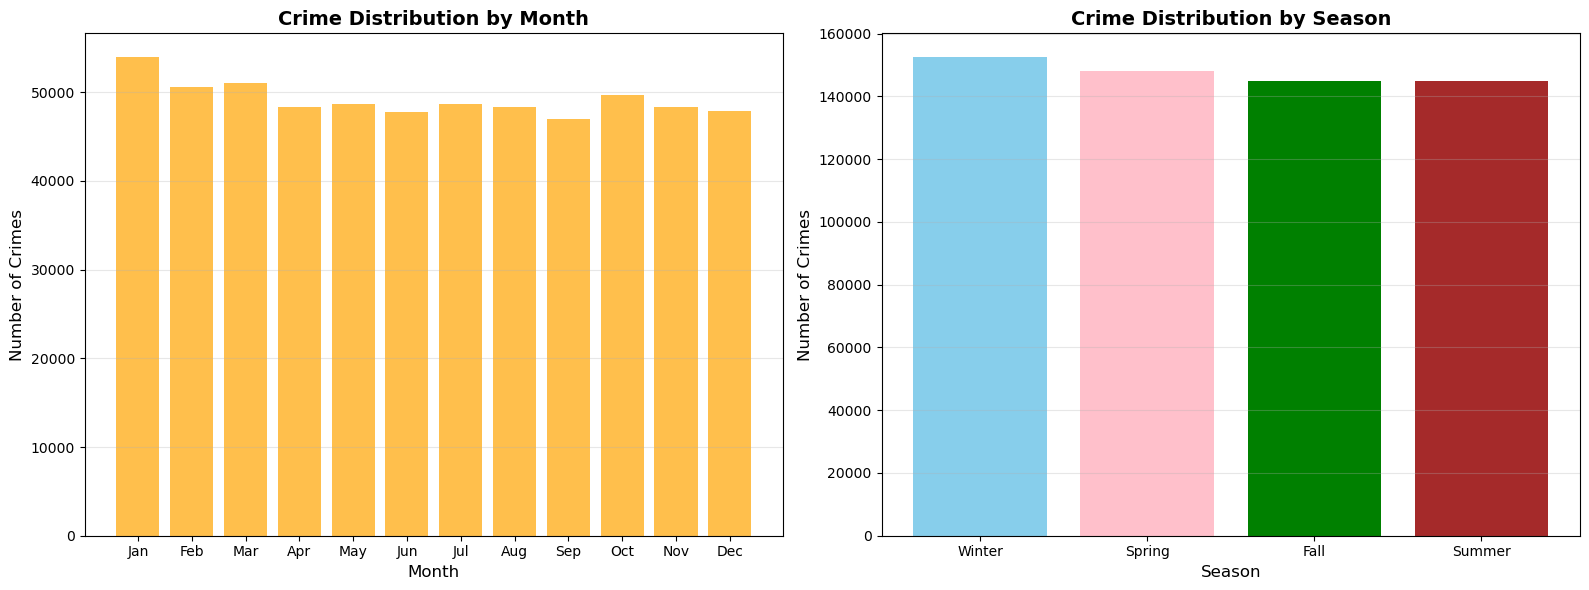


Seasonal Crime Counts:
Season
Winter    152457
Spring    148062
Fall      145010
Summer    144771
Name: count, dtype: int64


In [9]:
# seasonal patterns
df['Month'] = df['DATE OCC'].dt.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Monthly pattern
monthly_crimes = df['Month'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Monthly breakdown
ax1.bar(monthly_crimes.index, monthly_crimes.values, color='orange', alpha=0.7)
ax1.set_title('Crime Distribution by Month', fontsize=14, weight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Crimes', fontsize=12)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.grid(axis='y', alpha=0.3)

# Seasonal breakdown
seasonal_crimes = df['Season'].value_counts()
ax2.bar(seasonal_crimes.index, seasonal_crimes.values, color=['skyblue', 'pink', 'green', 'brown'])
ax2.set_title('Crime Distribution by Season', fontsize=14, weight='bold')
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Number of Crimes', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSeasonal Crime Counts:")
print(seasonal_crimes)

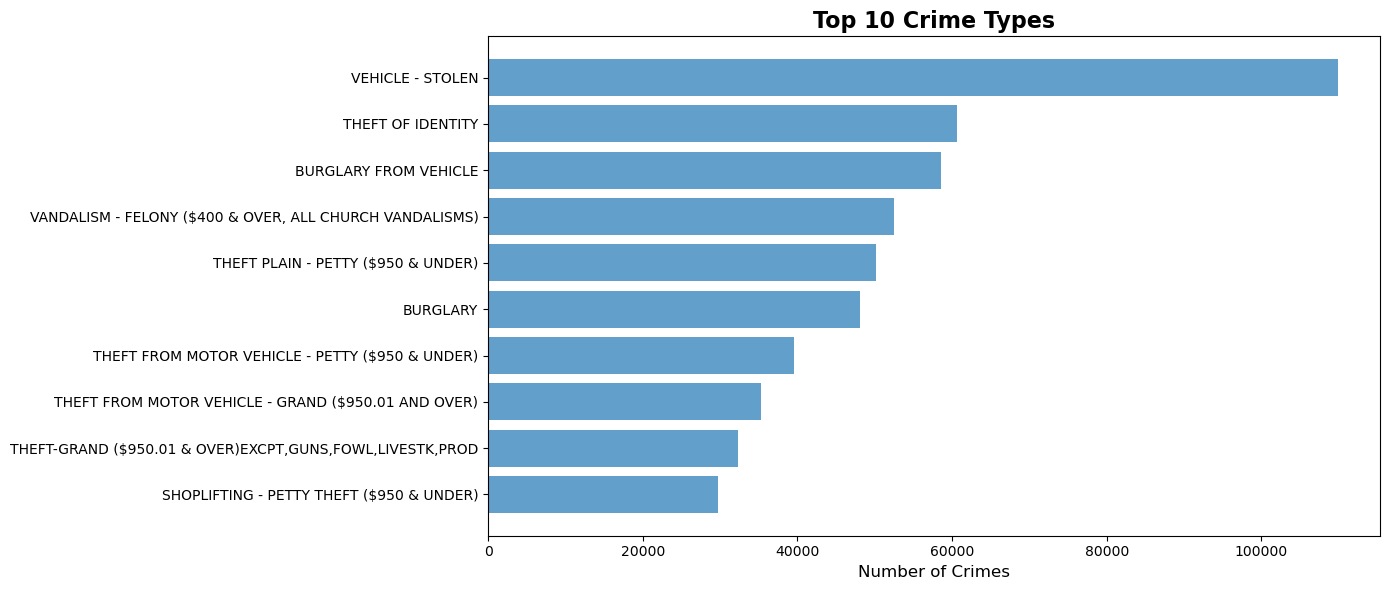


Top 10 Crime Types:
Crm Cd Desc
VEHICLE - STOLEN                                            109847
THEFT OF IDENTITY                                            60678
BURGLARY FROM VEHICLE                                        58559
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      52469
THEFT PLAIN - PETTY ($950 & UNDER)                           50199
BURGLARY                                                     48049
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              39513
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          35294
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     32307
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     29729
Name: count, dtype: int64


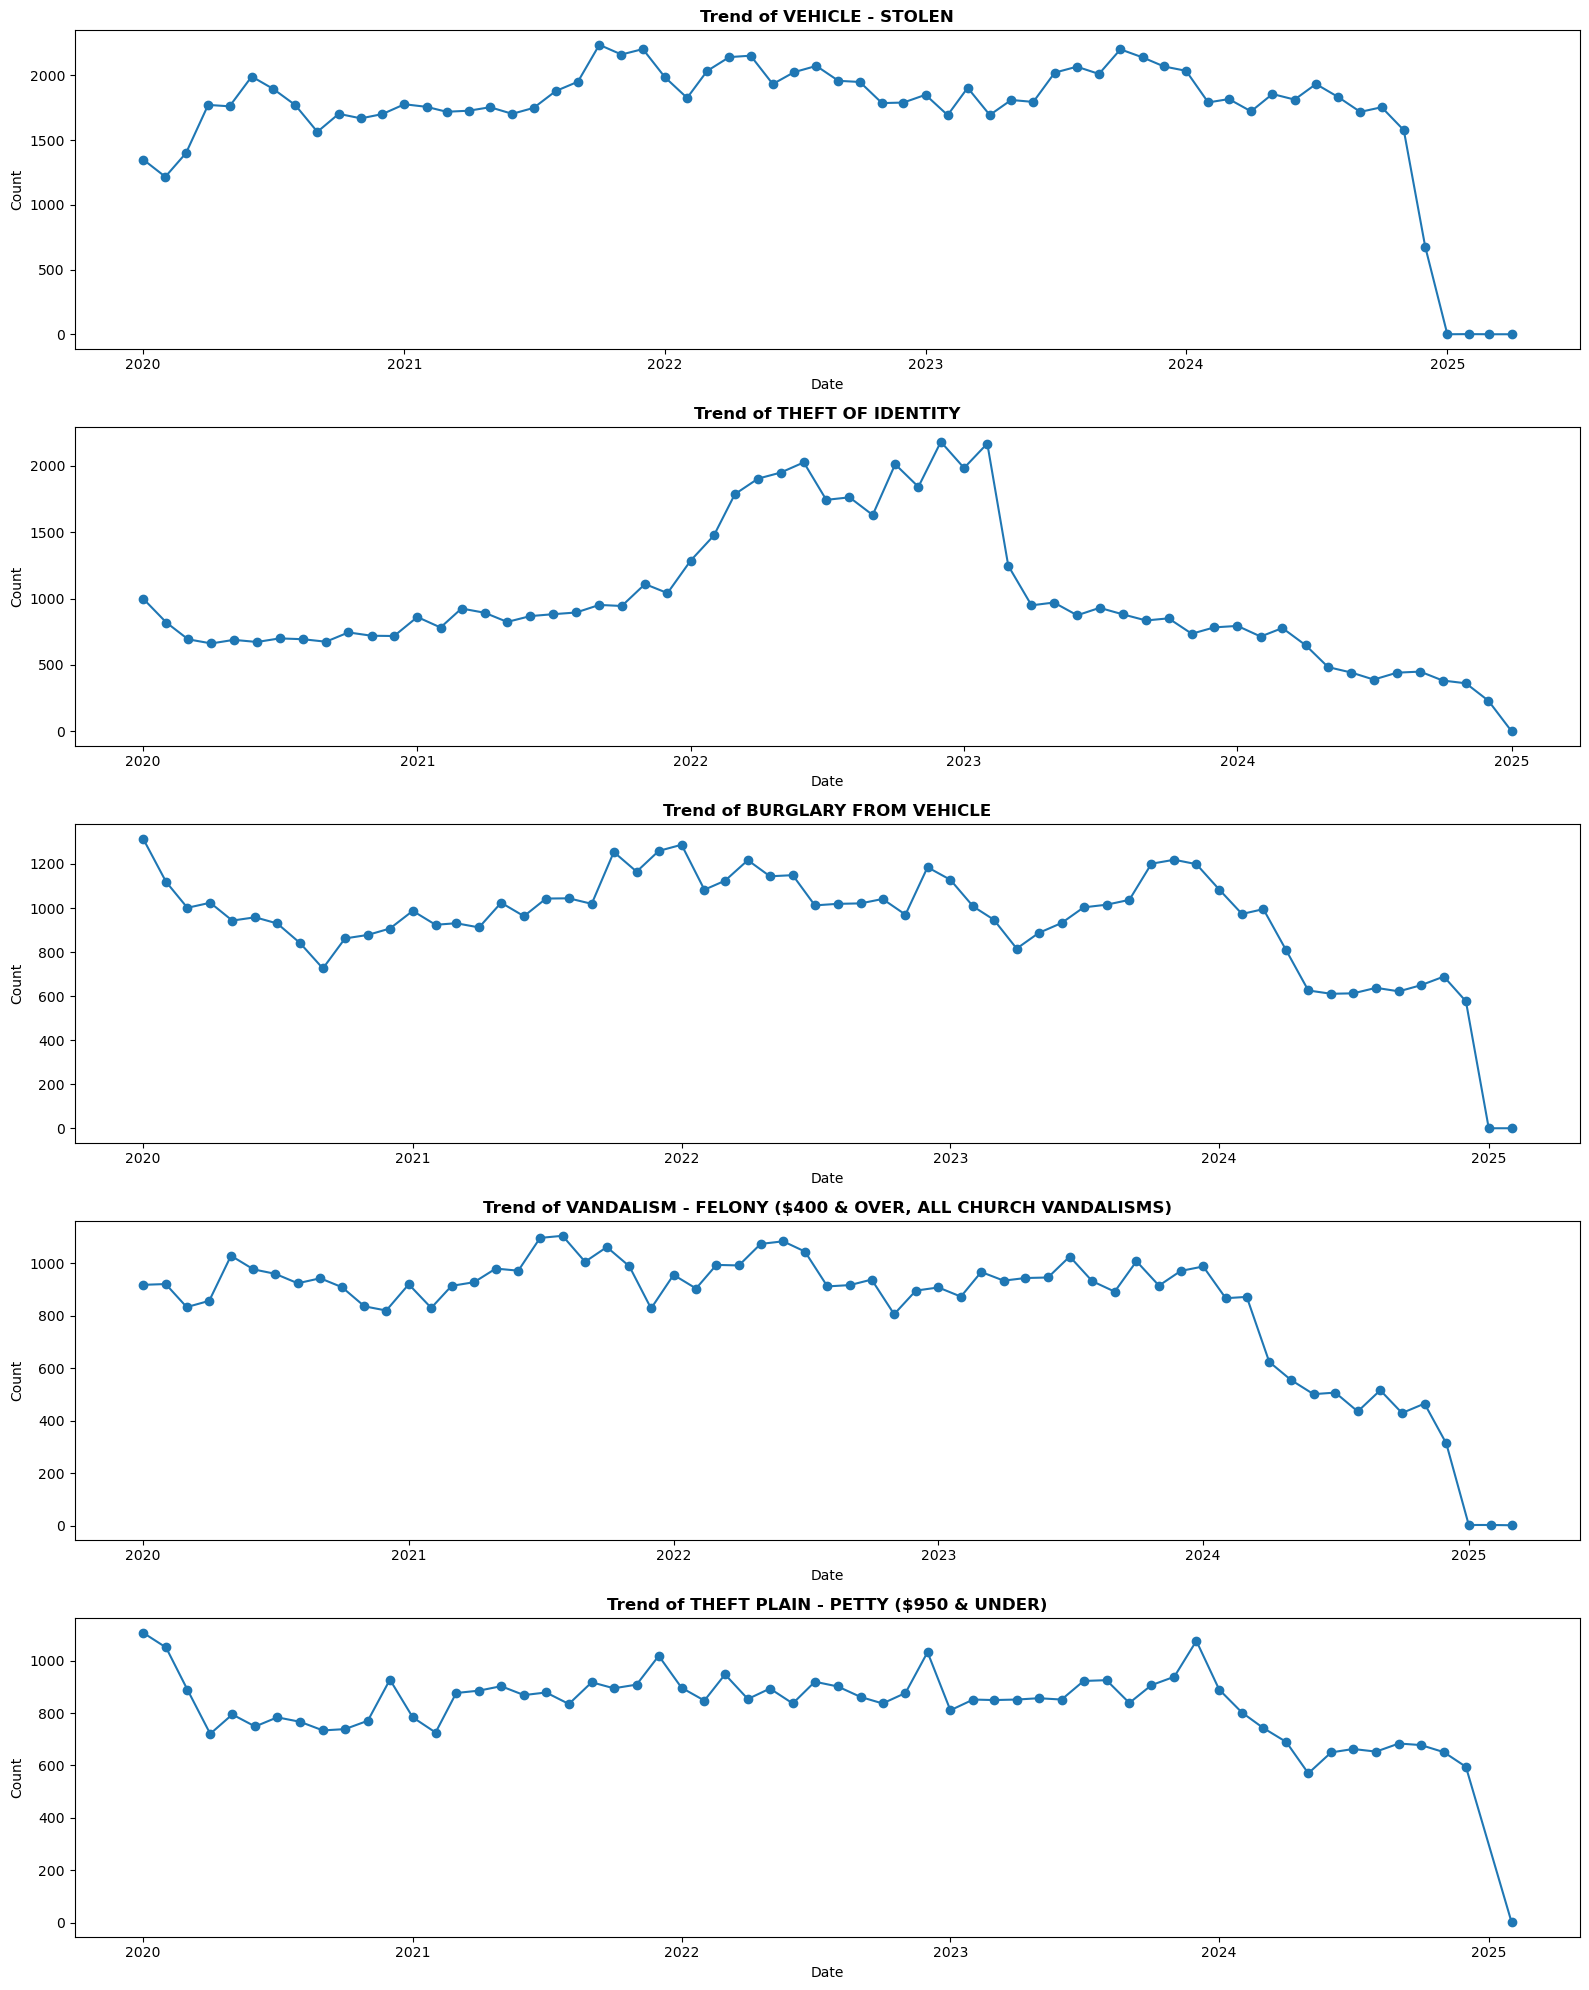


Crime Type Statistics:

count        76.000000
mean       7767.105263
std       19177.655838
min           1.000000
25%          10.000000
50%          99.000000
75%        2952.500000
max      109847.000000
Name: count, dtype: float64


In [10]:
# Identify the most common type of crime and its trends over time.
top_crimes = df['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(14, 6))
plt.barh(top_crimes.index[::-1], top_crimes.values[::-1], alpha=0.7)
plt.title('Top 10 Crime Types', fontsize=16, weight='bold')
plt.xlabel('Number of Crimes', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 10 Crime Types:")
print(top_crimes)

# Get top 10 crime types
top_crimes = df['Crm Cd Desc'].value_counts().head(5).index

# Plot trend for each crime type separately
plt.figure(figsize=(16, 20))  

for i, crime in enumerate(top_crimes, 1):
    plt.subplot(len(top_crimes), 1, i)
    crime_trend = df[df['Crm Cd Desc'] == crime].groupby(df['DATE OCC'].dt.to_period('M')).size()
    crime_trend.index = crime_trend.index.to_timestamp()  # Convert period to timestamp for plotting
    plt.plot(crime_trend.index, crime_trend.values, marker='o', linestyle='-')
    plt.title(f'Trend of {crime}', fontsize=12, weight='bold')
    plt.xlabel('Date')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Count statistics for crime types
print("\nCrime Type Statistics:\n")
crime_counts = df['Crm Cd Desc'].value_counts()
print(crime_counts.describe())

In [11]:
crime_by_month_type = df.groupby(['Month', 'Crm Cd Desc']).size().unstack(fill_value=0)
crime_by_month_type

Crm Cd Desc,ARSON,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BATTERY - SIMPLE ASSAULT,BIKE - ATTEMPTED STOLEN,BIKE - STOLEN,BLOCKING DOOR INDUCTION CENTER,BOAT - STOLEN,"BUNCO, ATTEMPT","BUNCO, GRAND THEFT","BUNCO, PETTY THEFT",...,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",THROWING OBJECT AT MOVING VEHICLE,TILL TAP - GRAND THEFT ($950.01 & OVER),TILL TAP - PETTY ($950 & UNDER),UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)"
Month,,,,,,,,,,,,,,,,,,,,,
1,140,0,0,0,597,0,11,29,599,230,...,2877,1,3,3,65,4692,2068,319,8998,222
2,124,0,0,0,614,1,5,31,583,205,...,2737,5,2,0,57,4397,1867,271,8286,213
3,150,0,0,0,659,0,6,20,542,174,...,2726,0,2,5,57,4581,1957,268,8875,219
4,145,0,0,1,657,0,12,26,447,160,...,2558,0,0,1,42,4335,1869,246,9057,229
5,146,0,0,1,709,1,8,22,415,152,...,2573,2,1,1,47,4582,1846,200,9333,216
6,136,0,0,0,652,3,12,31,498,134,...,2660,3,0,4,37,4480,1729,230,9235,226
7,143,0,0,0,620,0,11,23,471,154,...,2680,4,1,1,33,4635,1792,288,9624,213
8,151,0,0,0,706,0,14,20,532,155,...,2705,3,0,2,27,4308,1731,296,9623,186
9,142,0,0,2,815,0,8,31,474,163,...,2575,4,3,4,32,4274,1716,275,9202,303


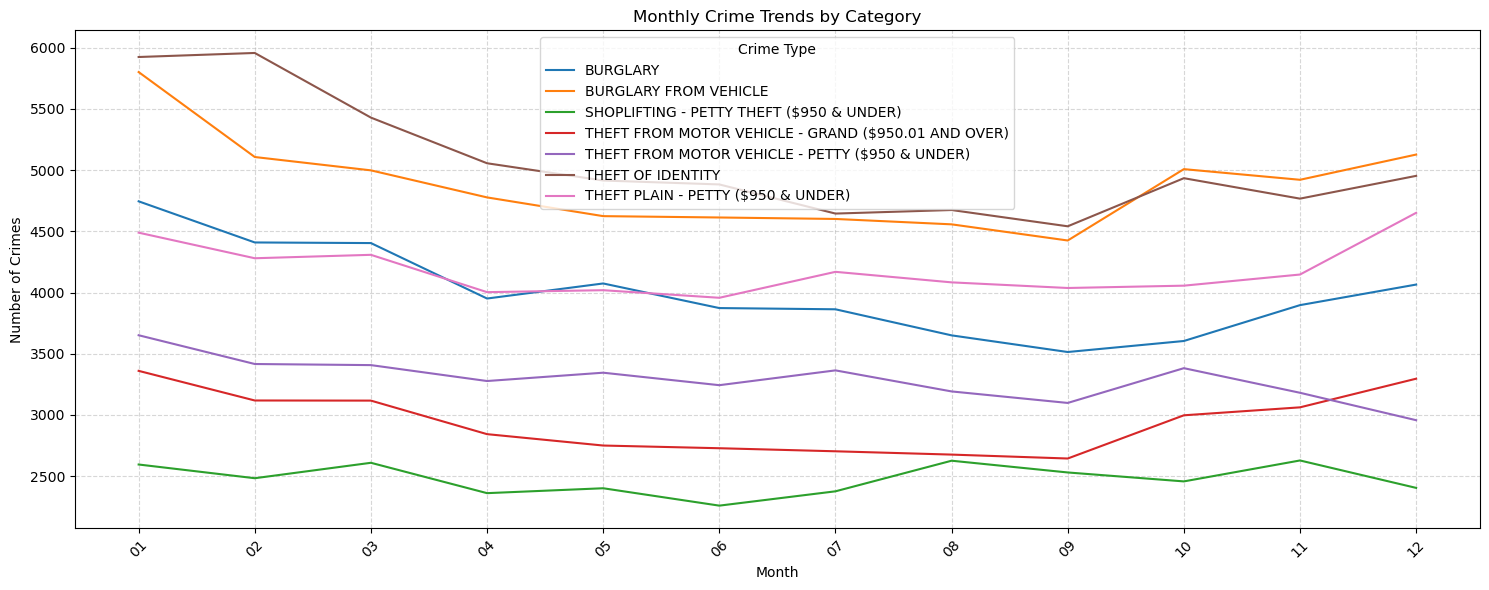

In [12]:
# Crime incidents by Month and Type over Time
ls=[]
for column in crime_by_month_type.columns:
    if crime_by_month_type[column].sum() > 20000:
        ls.append(column)
ls
top_categories = ls[:7]

plt.figure(figsize=(15,6))

months = [f"{m:02}" for m in crime_by_month_type.index]

for c in top_categories:
    plt.plot(months, crime_by_month_type[c], label=c)

plt.title('Monthly Crime Trends by Category')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

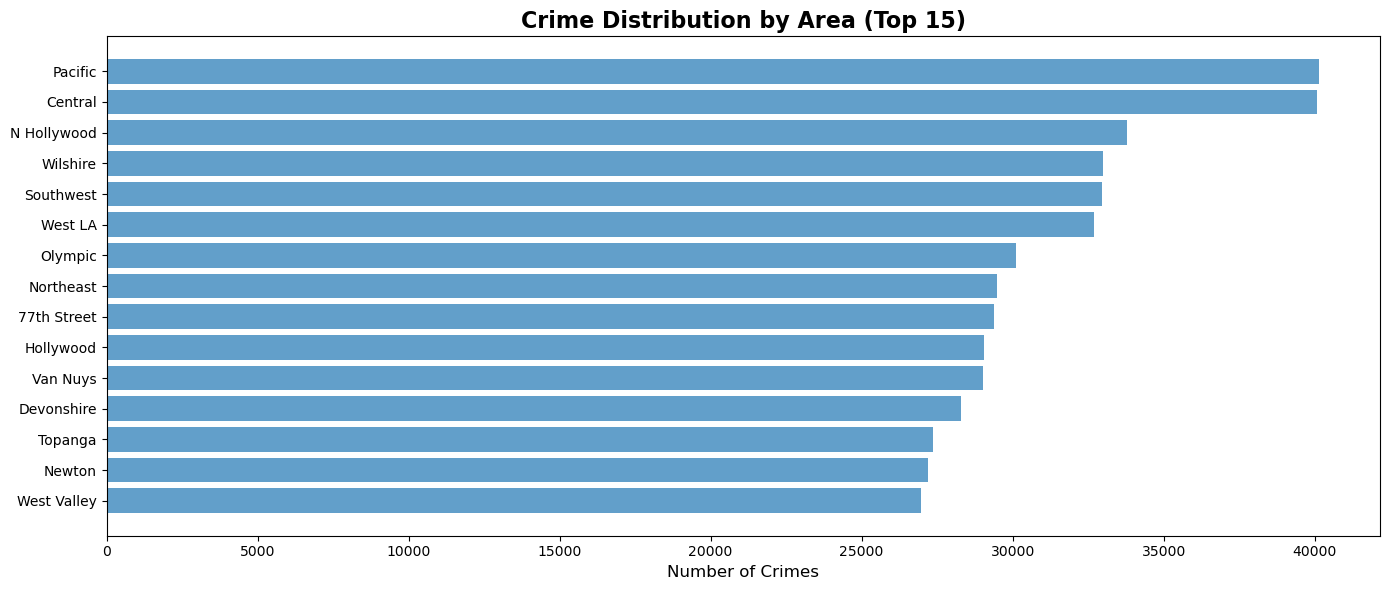


Top 5 Areas by Crime Count:
AREA NAME
Pacific        40155
Central        40061
N Hollywood    33785
Wilshire       33005
Southwest      32951
Name: count, dtype: int64


In [13]:
# Crime by area
area_crimes = df['AREA NAME'].value_counts().head(15)

plt.figure(figsize=(14, 6))
plt.barh(area_crimes.index[::-1], area_crimes.values[::-1], alpha=0.7)
plt.title('Crime Distribution by Area (Top 15)', fontsize=16, weight='bold')
plt.xlabel('Number of Crimes', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 5 Areas by Crime Count:")
print(area_crimes.head())

Correlation between crime count and unemployment rate:
                    crime_count  unemployment_rate
crime_count           1.000000          -0.015814
unemployment_rate    -0.015814           1.000000


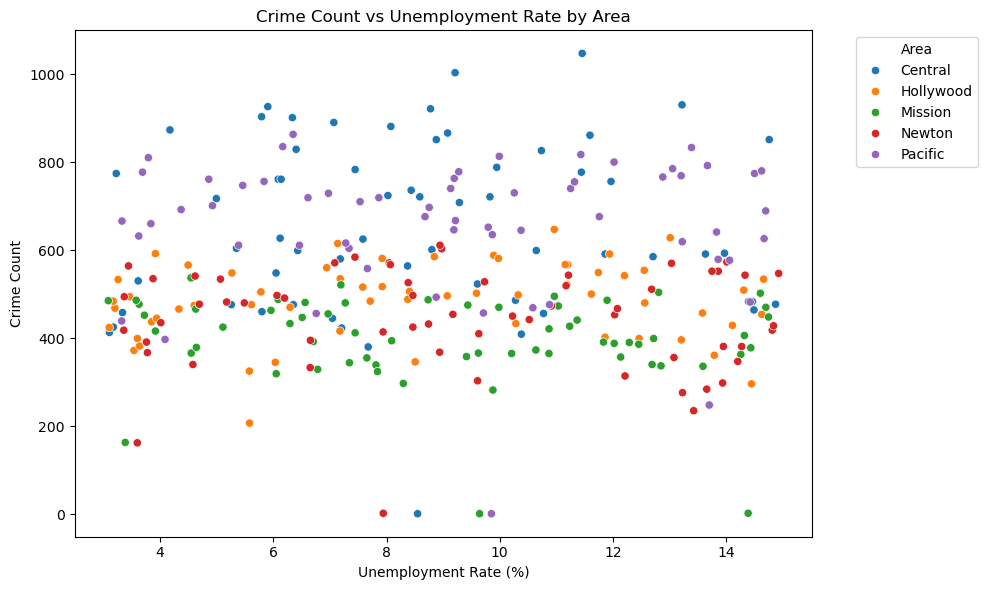

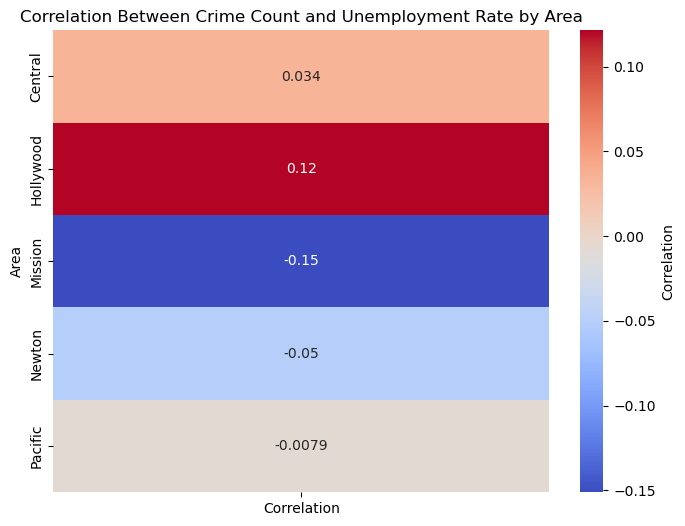

In [15]:
# Explore correlations between economic factors (if available) and crime rates.
crime_df = df.copy()

# Load unemployment dataset
unemployment_df = pd.read_csv('unemployment_rates_2020_present.csv', parse_dates=['DATE'])

# Aggregate crime counts monthly per area
crime_df['YearMonth'] = crime_df['DATE OCC'].dt.to_period('M')
crime_by_area = crime_df.groupby(['AREA NAME', 'YearMonth']).size().reset_index(name='crime_count')

unemployment_df['YearMonth'] = unemployment_df['DATE'].dt.to_period('M')

# Merge datasets
merged_df = pd.merge(crime_by_area, unemployment_df[['AREA NAME', 'YearMonth', 'unemployment_rate']], on=['AREA NAME', 'YearMonth'], how='inner')

# Compute correlation
correlation = merged_df[['crime_count', 'unemployment_rate']].corr()
print("Correlation between crime count and unemployment rate:\n", correlation)


plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='unemployment_rate', y='crime_count', hue='AREA NAME')
plt.title('Crime Count vs Unemployment Rate by Area')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Count')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Compute correlations per area
correlations = []
areas_with_corr = []

for area in merged_df['AREA NAME'].unique():
    temp_df = merged_df[merged_df['AREA NAME'] == area]
    if len(temp_df) > 1:  # Need at least 2 points to calculate correlation
        corr = temp_df['crime_count'].corr(temp_df['unemployment_rate'])
        correlations.append(corr)
        areas_with_corr.append(area)

# Prepare DataFrame for plotting
corr_df = pd.DataFrame({
    'Area': areas_with_corr,
    'Correlation': correlations
}).set_index('Area')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', cbar_kws={'label':'Correlation'})
plt.title('Correlation Between Crime Count and Unemployment Rate by Area')
plt.ylabel('Area')
plt.show()

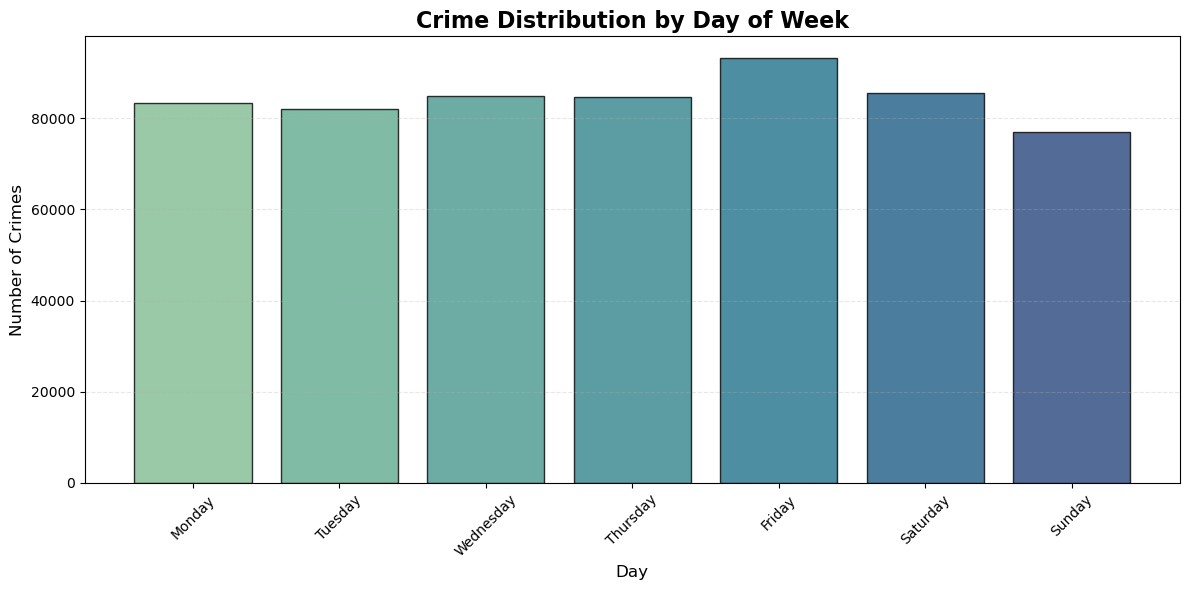


Crimes by Day of Week:
Day_of_Week
Monday       83304
Tuesday      82083
Wednesday    84801
Thursday     84516
Friday       93254
Saturday     85415
Sunday       76927
Name: count, dtype: int64


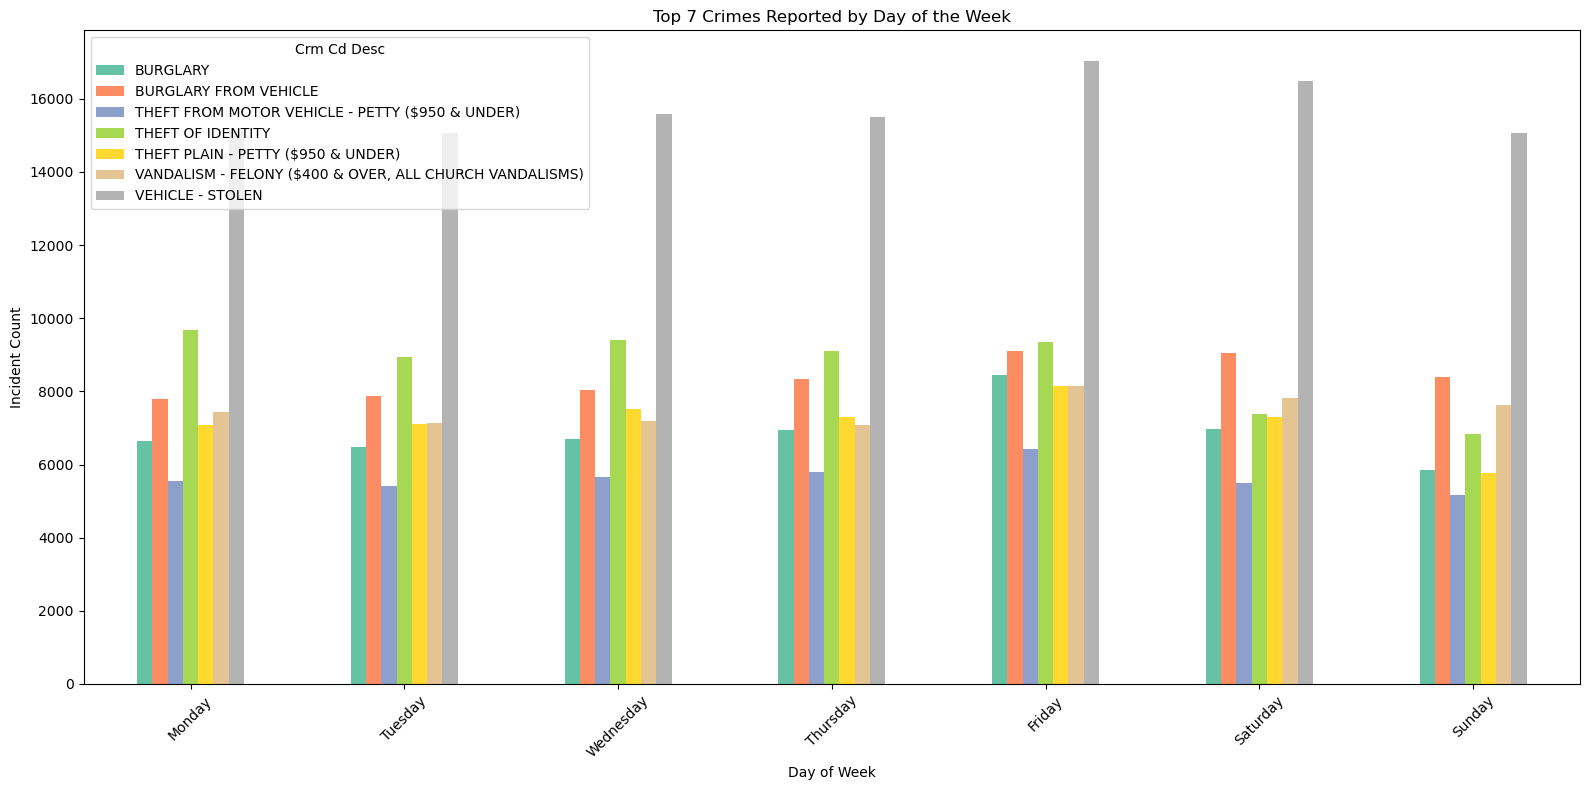

In [16]:
# Day of the week analysis 
df['Day_of_Week'] = df['DATE OCC'].dt.day_name()

# Crime by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_crimes = df['Day_of_Week'].value_counts().reindex(day_order)

# Choose a color palette
colors = sns.color_palette("crest", len(day_order))

plt.figure(figsize=(12, 6))
plt.bar(day_crimes.index, day_crimes.values, color=colors, edgecolor='black', alpha=0.8)
plt.title('Crime Distribution by Day of Week', fontsize=16, weight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCrimes by Day of Week:")
print(day_crimes)

# Identify the 5 most frequent crime types
common_crimes = df['Crm Cd Desc'].value_counts().head(7).index.tolist()

# Keep only the entries corresponding to these crimes
subset_df = df[df['Crm Cd Desc'].isin(common_crimes)]

# Aggregate crime occurrences by day of the week and crime description
crime_summary = subset_df.groupby(['Day_of_Week', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Define the correct order for days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_summary = crime_summary.reindex(days_order)

# Plot the result
crime_summary.plot(kind='bar', figsize=(16, 8), colormap='Set2')
plt.title('Top 7 Crimes Reported by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

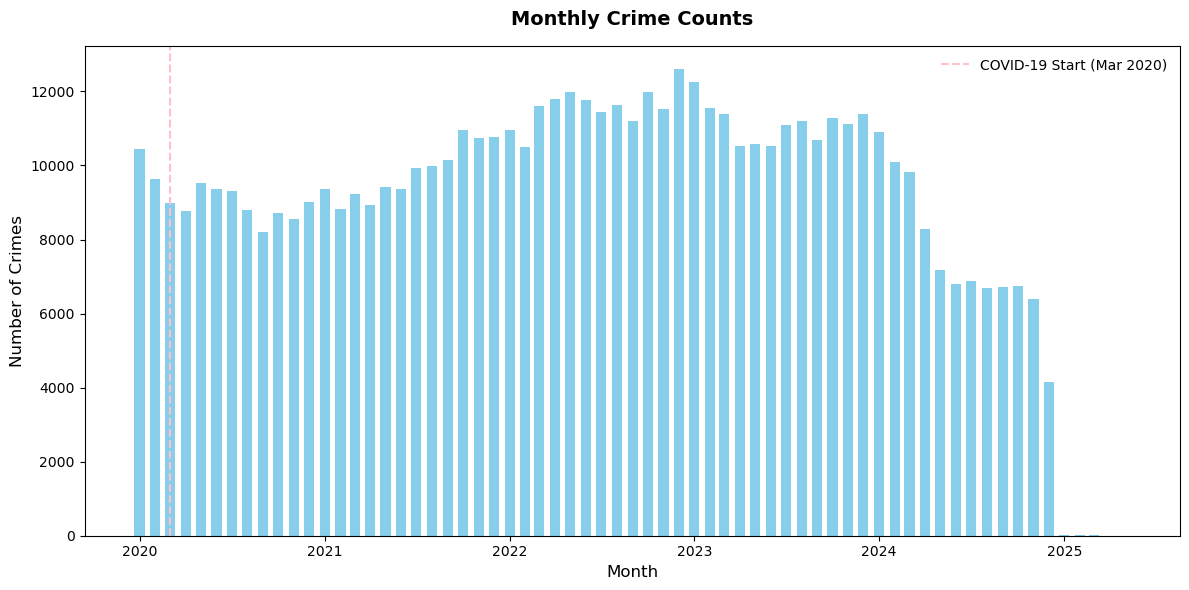

Crime Trend Analysis
Average monthly crimes before COVID-19: 10035.00
Average monthly crimes after COVID-19: 9051.27
Observation: Crime counts decreased on average after the start of COVID-19.


In [18]:
# Exploring potential effects of major events or policy shifts on overall crime activity
# Mark the estimated beginning of the COVID-19 pandemic

import pandas as pd
import matplotlib.pyplot as plt

# Aggregate monthly crime counts
monthly_trend = df.groupby(df['DATE OCC'].dt.to_period('M')).size()
monthly_trend.index = monthly_trend.index.to_timestamp()

# Mark COVID start
covid_start = pd.Timestamp('2020-03')

# Calculate pre-COVID and post-COVID averages
pre_covid_avg = monthly_trend[monthly_trend.index < covid_start].mean()
post_covid_avg = monthly_trend[monthly_trend.index >= covid_start].mean()

# Plot the trend
plt.figure(figsize=(12,6))
plt.bar(monthly_trend.index, monthly_trend, color='skyblue', width=20)

plt.axvline(covid_start, color='pink', linestyle='--', linewidth=1.5, label='COVID-19 Start (Mar 2020)')

plt.title('Monthly Crime Counts', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.legend(frameon=False, fontsize=10)

plt.gca().set_facecolor('white')
plt.grid(False)

plt.tight_layout()
plt.show()

# Automated analysis
print("Crime Trend Analysis")
print(f"Average monthly crimes before COVID-19: {pre_covid_avg:.2f}")
print(f"Average monthly crimes after COVID-19: {post_covid_avg:.2f}")

if post_covid_avg > pre_covid_avg:
    print("Observation: Crime counts increased on average after the start of COVID-19.")
elif post_covid_avg < pre_covid_avg:
    print("Observation: Crime counts decreased on average after the start of COVID-19.")
else:
    print("Observation: No significant change in crime counts before and after COVID-19.")


**Task 5** Advanced Analysis:

* Use predictive modeling techniques (e.g., time series forecasting) to predict future
crime trends.
* Explore additional questions or hypotheses related to the dataset.

In [19]:
# pip install prophet

16:34:52 - cmdstanpy - INFO - Chain [1] start processing
16:34:52 - cmdstanpy - INFO - Chain [1] done processing


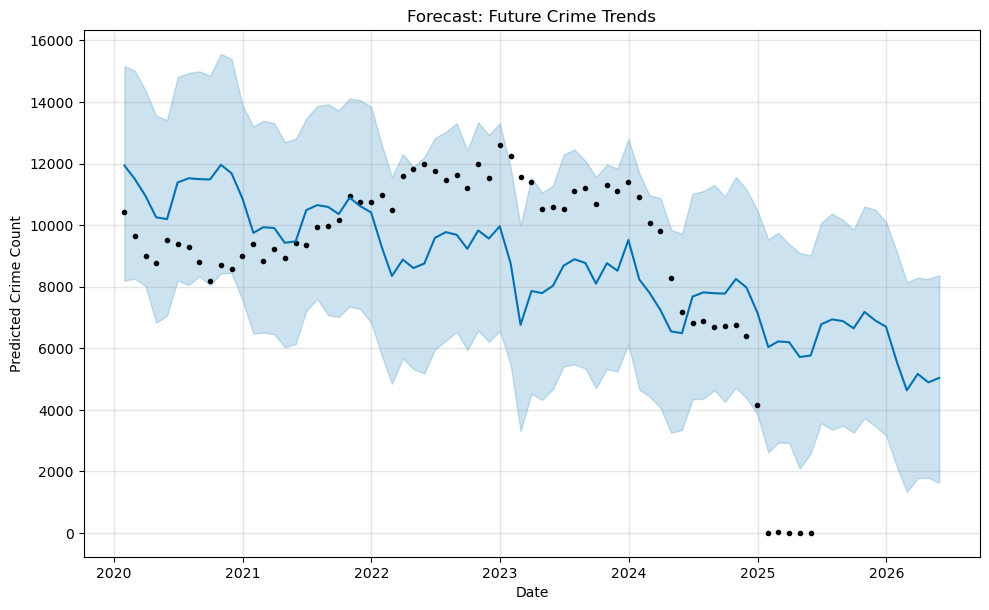

In [20]:
from prophet import Prophet
# Prepare monthly aggregated data
monthly_data = df.groupby(pd.Grouper(key='DATE OCC', freq='M')).size().reset_index(name='crime_count')
monthly_data = monthly_data.rename(columns={'DATE OCC': 'ds', 'crime_count': 'y'})

# Initialize and fit model
model = Prophet()
model.fit(monthly_data)    

# Forecast for next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Forecast: Future Crime Trends")
plt.xlabel("Date")
plt.ylabel("Predicted Crime Count")
plt.show()

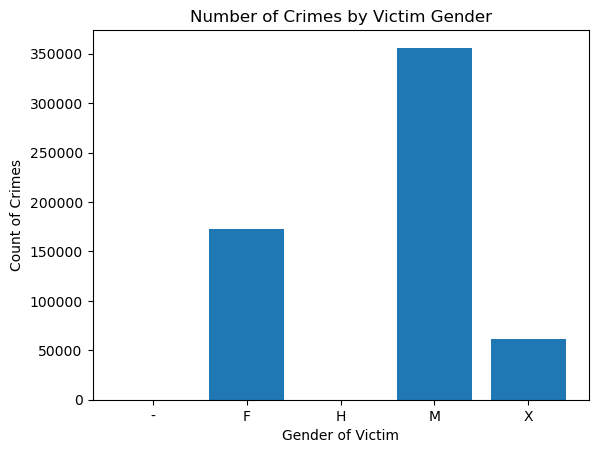

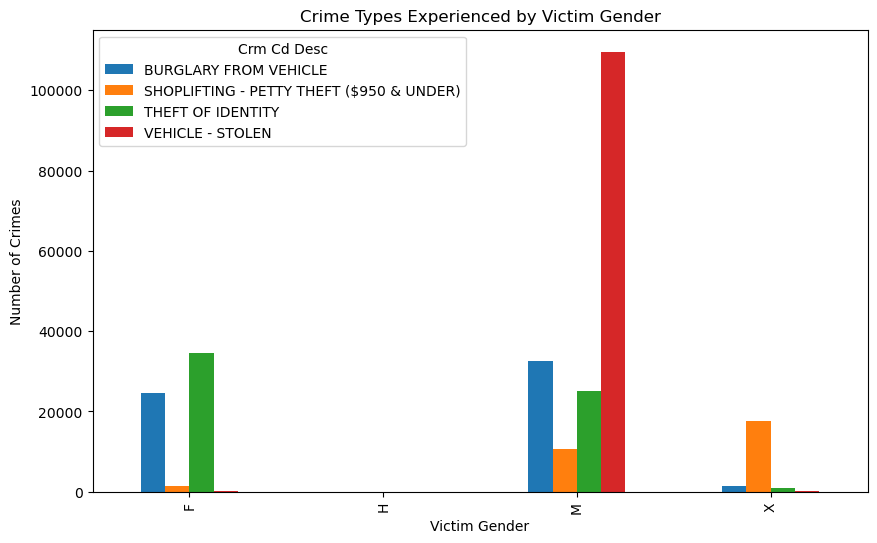

In [21]:
# Demographic Factors:

# Crime distribution based on victim gender
gender_counts = df.groupby('Vict Sex').size().fillna(0)
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Number of Crimes by Victim Gender')
plt.xlabel('Gender of Victim')
plt.ylabel('Count of Crimes')
plt.show()

target_crimes = ['THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE', 'VEHICLE - STOLEN', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)']
target_crime_df = crime_data[crime_data['Crm Cd Desc'].isin(target_crimes)]

gender_crime_counts = target_crime_df.groupby(['Vict Sex', 'Crm Cd Desc']).size().unstack(fill_value=0)
gender_crime_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Crime Types Experienced by Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.show()

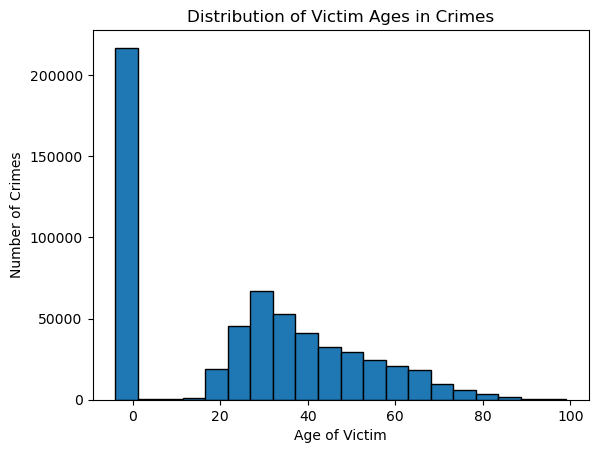

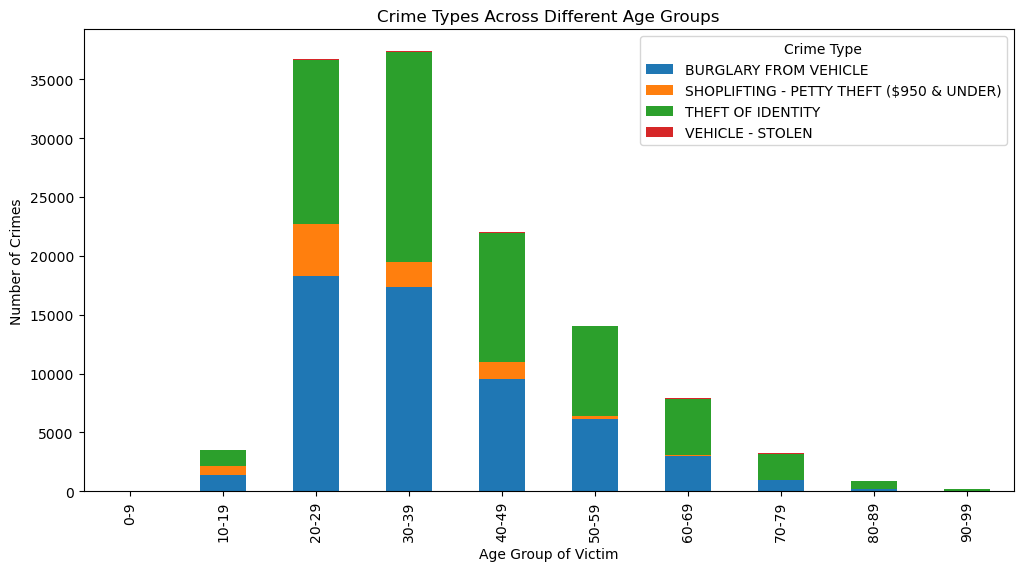

In [22]:
# Distribution of victim ages
plt.hist(crime_data['Vict Age'], bins=20, edgecolor='black')
plt.title('Distribution of Victim Ages in Crimes')
plt.xlabel('Age of Victim')
plt.ylabel('Number of Crimes')
plt.show()

age_edges = list(range(0, 101, 10))
age_labels = [f'{start}-{start+9}' for start in age_edges[:-1]]
target_crime_df['Age Group'] = pd.cut(target_crime_df['Vict Age'], bins=age_edges, labels=age_labels)

age_crime_counts = target_crime_df.groupby(['Age Group', 'Crm Cd Desc']).size().unstack(fill_value=0)
age_crime_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Types Across Different Age Groups')
plt.xlabel('Age Group of Victim')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type')
plt.show()